What is a data scientist? Seems like it means different things to different people. Well, what if we let the companies who need a data scientist tell us?

To do this, let's look at jobs on [Stack Overflow](stackoverflow.com). The advantage here is that each posting is along the same html format, as opposed to other sites like Indeed.com or Monster.com, where job descriptions vary by company. To do this, we need a cursory knowledge of html, and a python package that helps us with the heavy lifting.

In [4]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from urllib2 import urlopen
import string
import unicodedata
from IPython.display import Image
from nltk.corpus import stopwords

### Getting started

Here I'm using a job posting that I found by doing a simple seach for "data scientist" and choosing the
first result. This is fed in as `BASE_URL`, but this posting will likely expire and can be switched out easily.

We'll read in the posting using `urlopen` and then parse the page with `BeautifulSoup`.



In [5]:
BASE_URL = "http://careers.stackoverflow.com/jobs/89632/data-scientist-palo-alto-or-seattle-coupang?searchTerm=data+scientist"
html = urlopen(BASE_URL)
soup = BeautifulSoup(html, "lxml")

### A first look

Let's take a look at the website rendered locally on a browser. 

P.S. how was I able to get a picture of the whole webpage? I used the command-line tool [webkit2png](http://www.paulhammond.org/webkit2png/)   :)

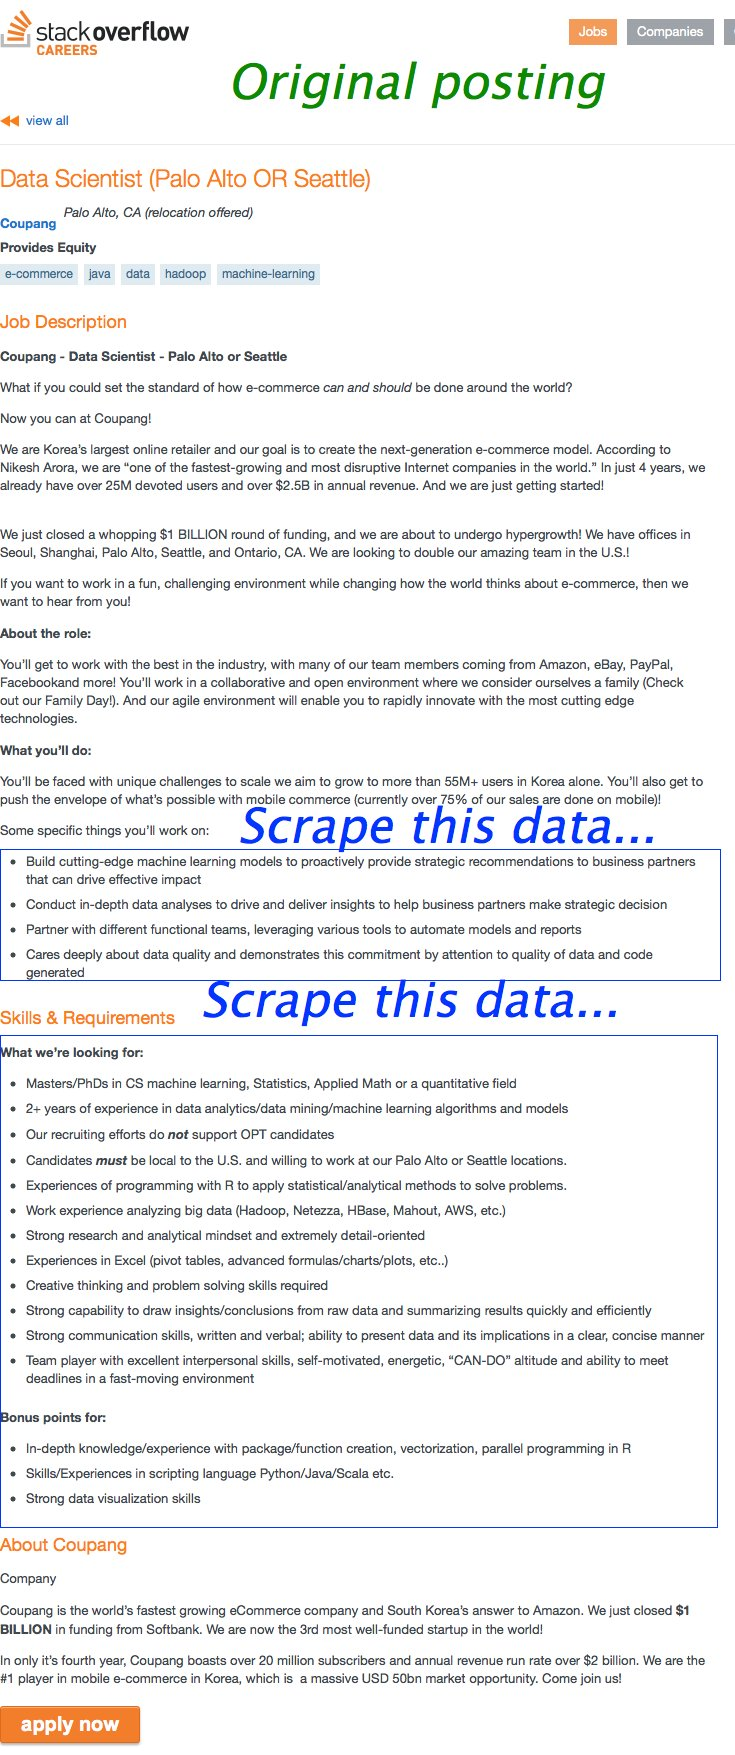

In [6]:
Image(filename='../../dataSandbox/forPelican/dataSciencePost2.jpg') 

### Finding our target

There's our target, the box above, shown in blue. We can figure out how to scrape it by looking directly at the elements in the extracted html. This can be done using `View > Developer > Developer tools` in Chrome. See below.

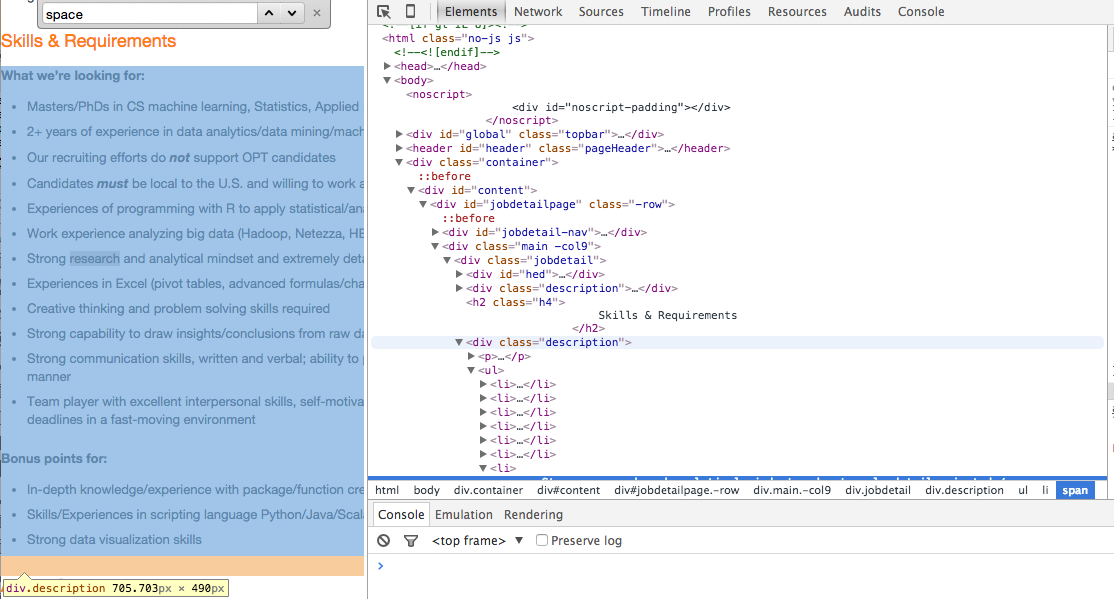

In [7]:
Image(filename = '../../dataSandbox/forPelican/elementsHtml.png')

### Scraping the lists

What you can see is that the elements we want are list `<li>` elements, which are children of `<div class="description">`. So what we will do is

1. Use Beautiful Soup to find `<div class="description">`, and choose the second instance, which contains the Skills and Requirements.
2. Use a for loop , find all list `<li>` elements within `<div class="description">`.
3. Clean up the text.

In [12]:
skillList = ''
for desc in soup.findAll("div", { "class" : "description" }):
    skills =  desc.findAll('li')
    skills = unicode.join(u'\n',map(unicode,skills))   #Switch away from ResultSet
    skills = re.sub('<[^>]*>', '', skills)             #Remove elements from text
    skills = re.sub('[()/!@#$,]', ' ', skills)         #Get rid of spurious characters
    skillList += skills

print skillList[0:554] + '\n...\n...'

Build cutting-edge machine learning models to proactively provide strategic recommendations to business partners that can drive effective impact
Conduct in-depth data analyses to drive and deliver insights to help business partners make strategic decision
Partner with different functional teams  leveraging various tools to automate models and reports
Cares deeply about data quality and demonstrates this commitment by attention to quality of data and code generatedMasters PhDs in CS machine learning  Statistics  Applied Math or a quantitative field

...
...


### Getting a clean output

Looks good, just text, with the punctuation removed. One more thing, let's get rid of stop words, or common words like "the", "in", etc., that are really not interesting

In [13]:
jobName = soup.find("a", {"class" : "title job-link"}).text.split()[0:3]
jobName = re.sub(r'\W+', '',  unicode.join(u'',map(unicode,jobName)))

# Get rid of common words
filtWords = [i for i in skillList.split() if i not in stopwords.words('english')]

# Export words as a data frame
df = pd.DataFrame({"words": filtWords})
df['title'] = jobName
df['url'] = BASE_URL.rsplit('/',3)[2]
if jobName.upper().find('DATA') == -1:
    df['data'] = False
else:
    df['data'] = True
df.head(10)



,words,title,url,data
0,Build,DataScientistPalo,89632,True
1,cutting-edge,DataScientistPalo,89632,True
2,machine,DataScientistPalo,89632,True
3,learning,DataScientistPalo,89632,True
4,models,DataScientistPalo,89632,True
5,proactively,DataScientistPalo,89632,True
6,provide,DataScientistPalo,89632,True
7,strategic,DataScientistPalo,89632,True
8,recommendations,DataScientistPalo,89632,True
9,business,DataScientistPalo,89632,True


### Wrapping up and future ideas

There we go, now we have a nice data frame that we can spit out containing the cleaned up required words along with the title (first three words) and URL. Also, some of the postings were unrelated to data science, so I added a fourth column, with a logical value, `True` if "data" is present in the first three words of the job title.

Now, we can make this into a function and iterate across many postings. Stay tuned!